In [95]:
# Imports
import pandas as pd
import numpy as np
import json as json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [96]:
 # Loading the data from CSV into panadas dataframe
tempIncomeStatement = pd.read_csv (r'../data/income_statement.csv', sep=',')
tempCashFlow = pd.read_csv (r'../data/cash_flow.csv', sep=',')
tempBalanceSheet = pd.read_csv (r'../data/balance-sheet.csv', sep=',')
tempEarnings = pd.read_csv (r'../data/EARNINGS.csv', sep=',')

tempMonthly = pd.read_csv (r'../data/monthly-data.csv', sep=',')
TickerSymbols = pd.read_csv (r'../data/nasdaq_screener_sorted_values.csv', sep=',')

In [97]:
# Printing Income statement
print(tempIncomeStatement)
print(tempIncomeStatement.columns)

# Printing Cash Flow
print(tempCashFlow.shape)
print(tempCashFlow.columns)

# Printing Balance Sheet
print(tempBalanceSheet.shape)
print(tempBalanceSheet.columns)

# Printing Earnings
print(tempEarnings.shape)
print(tempEarnings.columns)

     fiscalDateEnding reportedCurrency  grossProfit  totalRevenue  \
0          2021-09-30              USD  35174000000   82688000000   
1          2021-06-30              USD  35255000000   80769000000   
2          2021-03-31              USD  38079000000   88914000000   
3          2020-12-31              USD  44328000000  110801000000   
4          2020-09-30              USD  24689000000   64698000000   
...               ...              ...          ...           ...   
3899       2017-05-31              USD    345500000     572700000   
3900       2017-02-28              USD    325900000     566400000   
3901       2016-11-30              USD    356900000     623700000   
3902       2016-08-31              USD    326900000     597300000   
3903       2016-05-31              USD    248800000     710500000   

     costOfRevenue costofGoodsAndServicesSold operatingIncome  \
0      53802000000                48186000000     23786000000   
1      51591000000                4617900

In [98]:
# renaming Balance sheet column "fiscalDateEnding" to "timestamp" to match column name on both dataframes
tempIncomeStatement = tempIncomeStatement.rename(columns={"fiscalDateEnding": "timestamp"})
tempCashFlow = tempCashFlow.rename(columns={"fiscalDateEnding": "timestamp"})
tempBalanceSheet = tempBalanceSheet.rename(columns={"fiscalDateEnding": "timestamp"})
tempEarnings = tempEarnings.rename(columns={"fiscalDateEnding": "timestamp"})

# Merging all 4 frames into one

# Daily dates does not overlap on both dataframes, CompanyMonthly has the last trading day (not including weekends)
# While CompanyBalanaceSheet always has the last day of the month (including weekends)
# We need to cut out the daily date for both dataframes["timestamp"], to be able to merge them properly.
# Slicing the timestamp in CompanyMonthly, removing the days
sliceMonthly = tempMonthly["timestamp"].str.slice(0, -3)
tempMonthly["timestamp"] = sliceMonthly

# Printing
print("Monthly Data:")
print(tempMonthly["timestamp"])

# Slicing the timestamp in Income Statement, removing the days
sliceIncomestatement = tempIncomeStatement["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempIncomeStatement["timestamp"] = sliceIncomestatement

# Slicing the timestamp in Cash Flow, removing the days
sliceCashFlow = tempCashFlow["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempCashFlow["timestamp"] = sliceCashFlow

# Slicing the timestamp in CompanyBalanceSheet, removing the days
sliceBalanceSheet = tempBalanceSheet["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempBalanceSheet["timestamp"] = sliceBalanceSheet

# Slicing the timestamp in Earnings, removing the days
sliceEarnings = tempEarnings["timestamp"].str.slice(0, -3)
# For some reason i needed to use Iloc here, don't know why... 
tempEarnings["timestamp"] = sliceEarnings

# Printing
print("Income Statement:")
print(tempIncomeStatement["timestamp"])
print("Cash Flow:")
print(tempCashFlow["timestamp"])
print("Balance Sheet:")
print(tempBalanceSheet["timestamp"])
print("Earnings:")
print(tempEarnings["timestamp"])
print("Ticker Symbols:")
print(TickerSymbols["Symbol"])
    

Monthly Data:
0        2021-11
1        2021-10
2        2021-09
3        2021-08
4        2021-07
          ...   
43662    2000-11
43663    2000-10
43664    2000-09
43665    2000-08
43666    2000-07
Name: timestamp, Length: 43667, dtype: object
Income Statement:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3899    2017-05
3900    2017-02
3901    2016-11
3902    2016-08
3903    2016-05
Name: timestamp, Length: 3904, dtype: object
Cash Flow:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3880    2017-05
3881    2017-02
3882    2016-11
3883    2016-08
3884    2016-05
Name: timestamp, Length: 3885, dtype: object
Balance Sheet:
0       2021-09
1       2021-06
2       2021-03
3       2020-12
4       2020-09
         ...   
3852    2017-05
3853    2017-02
3854    2016-11
3855    2016-08
3856    2016-05
Name: timestamp, Length: 3857, dtype: object
Earnings:
0        2021-09
1        2021-06
2 

In [99]:
# for each company we want to make adjustments needed for each companys features and then we will merge them into one df

#------------ add error if ticker symbol is not in TickerSymbols["Symbol"] or size < 200


TickerSymbols = TickerSymbols[~TickerSymbols['Symbol'].isin(['RIVN'])]
final_df = pd.DataFrame()
counter = 0

for tickerSymbol in TickerSymbols["Symbol"]:
    counter = counter +1
    print("this is the beginning of the forloop, tickersymbol: " + tickerSymbol + "counter = " + str(counter))
    
    # filter all dataframes for each ticketsymbol (stock)
    CompanyIncomeStatement = tempIncomeStatement.loc[tempIncomeStatement["symbol"] == tickerSymbol]
    CompanyCashFlow = tempCashFlow.loc[tempCashFlow["symbol"] == tickerSymbol]
    CompanyBalanceSheet = tempBalanceSheet.loc[tempBalanceSheet["symbol"] == tickerSymbol]
    CompanyEarnings = tempEarnings.loc[tempEarnings["symbol"] == tickerSymbol]
    CompanyMonthly = tempMonthly.loc[tempMonthly["Symbol"] == tickerSymbol]
    
    # Removing symbol for all Company dataframes
    CompanyIncomeStatement.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyCashFlow.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyBalanceSheet.drop(["reportedCurrency", 'symbol'], axis=1, inplace=True)
    CompanyEarnings.drop(['symbol', 'reportedDate'], axis=1, inplace=True)
    CompanyMonthly.drop(['Symbol'], axis=1, inplace=True)
    
    # Cutting out unecessary data from the CompanyMonthly
    # We only need price data in CompanyMonthly within the daterange of the 20 rows on CompanyBalanceSheet data
    # every row is 3 months in CompanyBalanceSheet. Every row in CompanyMonthly is 1 month, 3x20 = 60.
    idx = (CompanyMonthly.index[0]+60)
    CompanyMonthly = CompanyMonthly.loc[:idx]

    # calculating 1 month labels
    CompanyMonthly["1m"] = CompanyMonthly["close"].pct_change(periods = -1).shift(periods = 1)
    #print(CompanyMonthly.head(21))
    
    # merge all df into a temp df
    temp_df = pd.merge(CompanyIncomeStatement, CompanyCashFlow, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyBalanceSheet, how="outer", on = "timestamp")
    temp_df = pd.merge(temp_df, CompanyEarnings, how="outer", on = "timestamp")
    print(temp_df)
    # merging the rows from balance sheet and monthly on timestamp.
    merged_df = pd.merge(temp_df, CompanyMonthly, how="outer", on = "timestamp")
    
    # removing the rows over 20
    merged_df = merged_df.loc[:19]

    # calculate how much the increase is in percentage, interval of 3 months
    # also offsetting by 1, to get the labels on the correct row.
    cat = ["timestamp", "symbol", "close", "change"]
    merged_df["3m"] = merged_df["close"].pct_change(periods = -1).shift(periods = 1)
    
    # Removing the first row, because we do not have a label for it, 3 months have not passed yet for us to get the end price of the 3 month cycle
    #merged_df.drop(index=merged_df.index[0], axis=0, inplace=True)

    # Also dropping columns that we do not need, symbol, Symbol, open, high, low, close, volume etc.
    merged_df.drop(['open','high','low','volume', "close"], axis=1, inplace=True)

    # replacing all "None" strings with NaN data type
    merged_df = merged_df.replace('None', np.nan)

    # Checking for "None" Strings
    sub_df = merged_df.loc[: , (merged_df == 'None').any()]
    print(sub_df)
    
    for col in merged_df.columns:
        if col != "timestamp":
            merged_df[col] = merged_df[col].astype("float")
            merged_df[col] = merged_df[col].replace(np.nan, merged_df[col].mean())
    
    # adding it to the final dataframe
    final_df = pd.concat([final_df, merged_df], axis=0)

this is the beginning of the forloop, tickersymbol: AAPLcounter = 1
    timestamp  grossProfit  totalRevenue costOfRevenue  \
0     2021-09  35174000000   82688000000   53802000000   
1     2021-06  35255000000   80769000000   51591000000   
2     2021-03  38079000000   88914000000   56819000000   
3     2020-12  44328000000  110801000000   72742000000   
4     2020-09  24689000000   64698000000   44945000000   
..        ...          ...           ...           ...   
98    1997-03          NaN           NaN           NaN   
99    1996-12          NaN           NaN           NaN   
100   1996-09          NaN           NaN           NaN   
101   1996-06          NaN           NaN           NaN   
102   1996-03          NaN           NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  48186000000     23786000000   
1                  46179000000     24126000000   
2                  51505000000     27503000000   
3                  67111000000     

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: GOOGcounter = 3
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  37307000000  64928000000   27621000000   
1    2021-06  35653000000  61880000000   26227000000   
2    2021-03  31211000000  55314000000   24103000000   
3    2020-12  30038000000  56118000000   26080000000   
4    2020-09  25013000000  46130000000   21117000000   
5    2020-06  19744000000  38297000000   18553000000   
6    2020-03  22177000000  41159000000   18982000000   
7    2019-12  24855000000  45569000000   21020000000   
8    2019-09  22935000000  40503000000   17568000000   
9    2019-06  21749000000  39045000000   17296000000   
10   2019-03  20327000000  36339000000   16012000000   
11   2018-12  21358000000  39276000000   17918000000   
12   2018-09  19459000000  33740000000   14281000000   
13   2018-06  18774000000  32657000000   13883000000   
14   2018-03  17679000000  31146000000   13467000000   
15   2017-12  18056000000  323230000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: GOOGLcounter = 4
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  37307000000  64928000000   27621000000   
1    2021-06  35653000000  61880000000   26227000000   
2    2021-03  31211000000  55314000000   24103000000   
3    2020-12  30038000000  56118000000   26080000000   
4    2020-09  25013000000  46130000000   21117000000   
..       ...          ...          ...           ...   
64   2005-09          NaN          NaN           NaN   
65   2005-06          NaN          NaN           NaN   
66   2005-03          NaN          NaN           NaN   
67   2004-12          NaN          NaN           NaN   
68   2004-09          NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 27621000000     21031000000                      8772000000   
1                 26227000000     19361000000                      8617000000   
2              

this is the beginning of the forloop, tickersymbol: TSLAcounter = 6
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  3660000000  13757000000   10097000000   
1    2021-06  2884000000  11958000000    9074000000   
2    2021-03  2215000000  10389000000    8174000000   
3    2020-12  2066000000  10744000000    8678000000   
4    2020-09  2063000000   8771000000    6708000000   
5    2020-06  1267000000   6036000000    4769000000   
6    2020-03  1234000000   5985000000    4751000000   
7    2019-12  1391000000   7384000000    5993000000   
8    2019-09  1191000000   6303000000    5112000000   
9    2019-06   921000000   6350000000    5429000000   
10   2019-03   566000000   4541000000    3975000000   
11   2018-12  1443000000   7226000000    5783000000   
12   2018-09  1524000000   6824000000    5300000000   
13   2018-06   619000000   4002000000    3383301000   
14   2018-03   456000000   3409000000    2952225000   
15   2017-12   438786000   3288249000    2849199000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: FBcounter = 7
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  23235000000  29006000000    5771000000   
1    2021-06  23674000000  29073000000    5399000000   
2    2021-03  21036000000  26167000000    5131000000   
3    2020-12  22730000000  27940000000    5210000000   
4    2020-09  17272000000  21466000000    4194000000   
5    2020-06  14854000000  18683000000    3829000000   
6    2020-03  14275000000  17734000000    3459000000   
7    2019-12  17475000000  20966000000    3491000000   
8    2019-09  14493000000  17648000000    3155000000   
9    2019-06  13576000000  16883000000    3307000000   
10   2019-03  12261000000  15077000000    2816000000   
11   2018-12  13896000000  16692000000    2796000000   
12   2018-09  11309000000  13727000000    2418000000   
13   2018-06  11017000000  13231000000    2214000000   
14   2018-03  10039000000  11966000000    1927000000   
15   2017-12  11361000000  12972000000

this is the beginning of the forloop, tickersymbol: NVDAcounter = 8
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-10  4631000000   7103000000    2472000000   
1    2021-08  4215000000   6507000000    2292000000   
2    2021-05  3629000000   5661000000    2032000000   
3    2021-01  3156000000   4819000000    4885000000   
4    2020-10  2960000000   4726000000    1766000000   
..       ...         ...          ...           ...   
88   2000-04         NaN          NaN           NaN   
89   2000-01         NaN          NaN           NaN   
90   1999-10         NaN          NaN           NaN   
91   1999-07         NaN          NaN           NaN   
92   1999-04         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  2472000000      2671000000                       557000000   
1                  2292000000      2444000000                       526000000   
2                  203200000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: TSMcounter = 9
   timestamp   grossProfit  totalRevenue costOfRevenue  \
0    2021-09  212746195000  414567890000  201821695000   
1    2021-06  186196770000  372107859000  185911089000   
2    2021-03  195236305000  361580627000  166344322000   
3    2020-12  195236325000  361580556000  166344231000   
4    2020-09  190493496000  356439030000  165945534000   
..       ...           ...           ...           ...   
89   1999-06           NaN           NaN           NaN   
90   1999-03           NaN           NaN           NaN   
91   1998-12           NaN           NaN           NaN   
92   1998-03           NaN           NaN           NaN   
93   1997-12           NaN           NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                201821695000    171003548000                      8929793000   
1                185911089000    145667210000                      7826555

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: Vcounter = 11
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  4695000000   6616000000    1921000000   
1    2021-06  4225000000   5999000000    1774000000   
2    2021-03  3724000000   5608000000    1884000000   
3    2020-12  3965000000   5551000000    1586000000   
4    2020-09  3805000000   5467000000    1662000000   
5    2020-06  3125000000   4695000000    1570000000   
6    2020-03  4101000000   5737000000    1636000000   
7    2019-12  4196000000   5947000000    1751000000   
8    2019-09  4447000000   6137000000    1690000000   
9    2019-06  4206000000   5840000000    1634000000   
10   2019-03  3935000000   5494000000    1559000000   
11   2018-12  3988000000   5506000000    1518000000   
12   2018-09  1380000000   5434000000    4054000000   
13   2018-06  4618000000   5240000000     622000000   
14   2018-03  4437000000   5073000000     636000000   
15   2017-12  4258000000   4862000000     604000000   

this is the beginning of the forloop, tickersymbol: JNJcounter = 12
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  16088000000  23318000000   14410000000   
1     2021-06  15725000000  23272000000   14916000000   
2     2021-03  15258000000  22258000000   13762000000   
3     2020-12  14661000000  22475000000    7814000000   
4     2020-09  14110000000  21038000000   13671000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   7250000000      4606000000   
1                   7587000000      5002000000   
2                   7063000000      5394000000   
3                   7814000000      4172000000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: UNHcounter = 13
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  53014000000  72337000000   19323000000   
1     2021-06  52524000000  71321000000   18797000000   
2     2021-03  51643000000  70196000000   18553000000   
3     2020-12  45599000000  65467000000   19868000000   
4     2020-09  46287000000  65115000000   18828000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   7802000000      5712000000   
1                   7660000000      5978000000   
2                   7572000000      6739000000   
3                   7622000000      3517000000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: ADIcounter = 15
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-07  1221184000   1758853000     537669000   
1     2021-05  1136637000   1661407000     524770000   
2     2021-01  1045371000   1558458000     513087000   
3     2020-10  1023084000   2815703000    1792619000   
4     2020-08   972578000   1456136000     483558000   
..        ...         ...          ...           ...   
110   1997-04         NaN          NaN           NaN   
111   1997-01         NaN          NaN           NaN   
112   1996-10         NaN          NaN           NaN   
113   1996-07         NaN          NaN           NaN   
114   1996-04         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                    537669000       609646000   
1                    524770000       519690000   
2                    513087000       463860000   
3                    503211000       461672000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: WMTcounter = 17
    timestamp  grossProfit  totalRevenue costOfRevenue  \
0     2021-07  35865000000  141048000000  105183000000   
1     2021-04  35038000000  138310000000  103272000000   
2     2021-01  36818000000  152079000000  115261000000   
3     2020-10  34369000000  134708000000  100339000000   
4     2020-07  35053000000  137742000000  102689000000   
..        ...          ...           ...           ...   
98    1997-04          NaN           NaN           NaN   
99    1997-01          NaN           NaN           NaN   
100   1996-10          NaN           NaN           NaN   
101   1996-07          NaN           NaN           NaN   
102   1996-04          NaN           NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                 105183000000      7354000000   
1                 103272000000      6909000000   
2                 115261000000      5487000000   
3                 100339000000     

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: ASMLcounter = 19
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  2711400000   5241300000    2529900000   
1    2021-06  2044600000   4020200000    1975600000   
2    2021-03  2352400000   4363900000    2011500000   
3    2020-12  2211100000   4254100000    2043000000   
4    2020-09  1881400000   3958000000    2076600000   
..       ...         ...          ...           ...   
80   1998-06         NaN          NaN           NaN   
81   1997-12         NaN          NaN           NaN   
82   1997-06         NaN          NaN           NaN   
83   1996-12         NaN          NaN           NaN   
84   1996-06         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  2529900000      1919300000                       182900000   
1                  1975600000      1239000000                       171800000   
2                  20115000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: MAcounter = 21
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  2744000000   4985000000    2241000000   
1    2021-06  2408000000   4528000000    2120000000   
2    2021-03  2197000000   4155000000    1958000000   
3    2020-12  2103000000   4120000000    2017000000   
4    2020-09  2105000000   3837000000    1732000000   
..       ...         ...          ...           ...   
58   2007-03         NaN          NaN           NaN   
59   2006-12         NaN          NaN           NaN   
60   2006-09         NaN          NaN           NaN   
61   2006-06         NaN          NaN           NaN   
62   2006-03         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  1166000000      2717000000                      2053000000   
1                  1130000000      2341000000                      1934000000   
2                  1104000000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: NFLXcounter = 23
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  3276878000   7483467000    4206589000   
1    2021-06  3323769000   7341777000    4018008000   
2    2021-03  3294771000   7163282000    3868511000   
3    2020-12  2479282000   6644442000    4165160000   
4    2020-09  2567886000   6435637000    3867751000   
..       ...         ...          ...           ...   
73   2003-06         NaN          NaN           NaN   
74   2003-03         NaN          NaN           NaN   
75   2002-12         NaN          NaN           NaN   
76   2002-09         NaN          NaN           NaN   
77   2002-06         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  4206589000      1755253000                       957738000   
1                  4018008000      1847630000                       938818000   
2                  38685110

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-07  4727000000   7085000000    5707000000   
1    2021-04  4408000000   6369000000    5343000000   
2    2021-01  4338000000   6122000000    5770000000   
3    2020-10  4025000000   5412000000    4963000000   
4    2020-07  3840000000   5294000000    4724000000   
..       ...         ...          ...           ...   
64   2005-07         NaN          NaN           NaN   
65   2005-04         NaN          NaN           NaN   
66   2005-01         NaN          NaN           NaN   
67   2004-10         NaN          NaN           NaN   
68   2004-07         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  1613000000       332000000                      3375000000   
1                  1555000000       354000000                      3103000000   
2                  1479000000       193000000                      3206000000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  11455000000  23847000000   12392000000   
1     2021-06   8898000000  18637000000    9739000000   
2     2021-03   7523000000  14274000000    6751000000   
3     2020-12    678000000   5724000000    5046000000   
4     2020-09   5211000000  11713000000    6502000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   9973000000      4420000000   
1                   7049000000      3201000000   
2                   4211000000      2691000000   
3                   1504000000     -6368000000   
4                   2007000000     -1104000000   
..             

this is the beginning of the forloop, tickersymbol: NKEcounter = 28
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-08  5696000000  12205000000   10124000000   
1     2021-05  5655000000  12352000000   10431000000   
2     2021-02  4719000000  10357000000    8679000000   
3     2020-11  4847000000  11243000000    9663000000   
4     2020-08  4741000000  10639000000    8828000000   
..        ...         ...          ...           ...   
98    1997-02         NaN          NaN           NaN   
99    1996-11         NaN          NaN           NaN   
100   1996-08         NaN          NaN           NaN   
101   1996-05         NaN          NaN           NaN   
102   1996-02         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   6552000000      2124000000   
1                   6689000000      1913000000   
2                   5638000000      1678000000   
3                   6396000000      1580000000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: XOMcounter = 29
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  71349000000  73786000000    2437000000   
1     2021-06  65225000000  67742000000    2517000000   
2     2021-03  56302000000  59147000000    2845000000   
3     2020-12  42650000000  46540000000    3890000000   
4     2020-09  43636000000  46199000000    2563000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  53454000000     68868000000   
1                  50752000000     62694000000   
2                  45667000000     53671000000   
3                  62332000000     37543000000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
this is the beginning of the forloop, tickersymbol: ORCLcounter = 31
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-08   6474000000   8988000000    2514000000   
1     2021-05  40479000000  40479000000    2849000000   
2     2021-02   6811000000   9482000000    2671000000   
3     2020-11   6507000000   9184000000    2677000000   
4     2020-08   6016000000   8703000000    2687000000   
..        ...          ...          ...           ...   
98    1997-02          NaN          NaN           NaN   
99    1996-11          NaN          NaN           NaN   
100   1996-08          NaN          NaN           NaN   
101   1996-05          NaN          NaN           NaN   
102   1996-02          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2103000000      3427000000   
1                   2122000000      4541

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: TMcounter = 32
   timestamp    grossProfit   totalRevenue  costOfRevenue  \
0    2021-09  1438953000000  7545741000000  6106788000000   
1    2021-06  1649638000000  7935557000000  6285919000000   
2    2021-03  1478095000000  7689337000000  6211242000000   
3    2020-12  1656703000000  8150033000000  6493330000000   
4    2020-09  1148147000000  6774427000000  5626280000000   
..       ...            ...            ...            ...   
62   2005-03            NaN            NaN            NaN   
63   2004-12            NaN            NaN            NaN   
64   2004-09            NaN            NaN            NaN   
65   2004-06            NaN            NaN            NaN   
66   2004-03            NaN            NaN            NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0               6106788000000    749975000000                    688978000000   
1               6285919000000    99748

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: LLYcounter = 34
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  3836700000   6772800000    2936100000   
1     2021-06  3172300000   6740100000    3567800000   
2     2021-03  3212800000   6805600000    3592800000   
3     2020-12  3825500000   7440000000    3614500000   
4     2020-09  2857700000   5740600000    2882900000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1430800000       549900000   
1                   1953200000      -186200000   
2                   1878600000      -259600000   
3                   1719800000        35500000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: KOcounter = 36
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  6065000000  10042000000    3977000000   
1     2021-06  6342000000  10129000000    3787000000   
2     2021-03  5515000000   9020000000    3505000000   
3     2020-12  5033000000   8611000000    3578000000   
4     2020-09  5181000000   8652000000    3471000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   3977000000      2898000000   
1                   3787000000      3016000000   
2                   3505000000      2722000000   
3                   3578000000      2338000000   
4         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: AVGOcounter = 38
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-08  4197000000   6778000000    2581000000   
1    2021-05  4057000000   6610000000    2553000000   
2    2021-01  3952000000   6655000000    2703000000   
3    2020-08  3316000000   5821000000    2505000000   
4    2020-05  3189000000   5742000000    2553000000   
..       ...         ...          ...           ...   
58   2010-07         NaN          NaN           NaN   
59   2010-04         NaN          NaN           NaN   
60   2010-01         NaN          NaN           NaN   
61   2009-10         NaN          NaN           NaN   
62   2009-07         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  2581000000      2126000000                       346000000   
1                  2553000000      1975000000                       325000000   
2                  27030000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: COSTcounter = 40
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-08   -84000000  62675000000      84000000   
1    2021-05  1663000000  45277000000   43614000000   
2    2021-02        None  44769000000          None   
3    2020-11  1430000000  43208000000   41778000000   
4    2020-08  1878000000  53383000000   51454000000   
..       ...         ...          ...           ...   
95   1997-09         NaN          NaN           NaN   
96   1997-06         NaN          NaN           NaN   
97   1996-12         NaN          NaN           NaN   
98   1996-09         NaN          NaN           NaN   
99   1996-03         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 54733000000      2275000000                      5632000000   
1                 39415000000      1663000000                      4189000000   
2                 390780000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: PEPcounter = 42
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  10795000000  20189000000    9394000000   
1     2021-06  10337000000  19217000000    8880000000   
2     2021-03   8149000000  14820000000    6671000000   
3     2020-12  12029000000  22455000000   10426000000   
4     2020-09   9935000000  18091000000    8156000000   
..        ...          ...          ...           ...   
96    1997-03          NaN          NaN           NaN   
97    1996-12          NaN          NaN           NaN   
98    1996-09          NaN          NaN           NaN   
99    1996-06          NaN          NaN           NaN   
100   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   9394000000      3159000000   
1                   8880000000      3129000000   
2                   6671000000      2312000000   
3                  10426000000      2826000000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: CVXcounter = 44
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  20119000000  44710000000   24591000000   
1     2021-06  15707000000  37597000000   21890000000   
2     2021-03  13134000000  32029000000   18895000000   
3     2020-12   5498000000  25246000000   19748000000   
4     2020-09   9949000000  24451000000   14502000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  23834000000     14109000000   
1                  20629000000      9712000000   
2                  17568000000      7177000000   
3                  13387000000      -529000000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: VZcounter = 46
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  22330000000  32915000000   10585000000   
1     2021-06  22420000000  33764000000   11344000000   
2     2021-03  21292000000  32867000000   11575000000   
3     2020-12  21356000000  34692000000   13336000000   
4     2020-09  20012000000  31543000000   11531000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  13528000000      8905000000   
1                  14255000000      8165000000   
2                  13522000000      7770000000   
3                  14822000000      7180000000  

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  4969000000  14342000000    9373000000   
1    2021-06  4272000000  13959000000    9687000000   
2    2021-03  3946000000  13010000000    9064000000   
3    2020-12  9174000000  13858000000    4684000000   
4    2020-09  2906000000  12902000000    9996000000   
5    2020-06  1787000000  10425000000    8638000000   
6    2020-03  4521000000   8619000000    4098000000   
7    2019-12  6698000000   8704000000    2006000000   
8    2019-09  6559000000   8479000000    1920000000   
9    2019-06  6436000000   8255000000    1819000000   
10   2019-03  6134000000   7828000000    1694000000   
11   2018-12  6283000000   8305000000    2022000000   
12   2018-09  6401000000   8236000000    1835000000   
13   2018-06  6344000000   8278000000    1934000000   
14   2018-03  6007000000   7934000000    1927000000   
15   2017-12  5458000000   7739000000    2281000000   
16   2017-09  5379000000   6995000000    1616000000   
17   2017-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  5399000000   9336000000    3937000000   
1     2021-06  4656000000   8060000000    3404000000   
2     2021-03  4503000000   7935000000    3432000000   
3     2020-12  4746000000   8235000000    3489000000   
4     2020-09  5580000000   8346000000    2766000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   3937000000      2902000000   
1                   3404000000      2195000000   
2                   3432000000      2166000000   
3                   3489000000      2526000000   
4                   2766000000      3452000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09   9281000000  19759000000   12189000000   
1     2021-06  10425000000  21163000000   12340000000   
2     2021-03   7143000000  19301000000   13232000000   
3     2020-12  -4841000000  17760000000   14896000000   
4     2020-09   2499000000  18862000000   16363000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                    220000000      6972000000   
1                    226000000      8112000000   
2                    226000000      4796000000   
3                    205000000     -9339000000   
4                    291000000      -974000000   
..             

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2086000000   4306000000    2603000000   
1     2021-06  1830000000   3840000000    2361000000   
2     2021-03  1587000000   3422000000    2272000000   
3     2020-12  1451000000   3235000000    2101000000   
4     2020-09  1230000000   2790000000    1844000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2227000000       948000000   
1                   2020000000       831000000   
2                   1858000000       662000000   
3                   1793000000       570000000   
4                   1571000000       449000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09   9890000000  23184000000   13294000000   
1    2021-06   9924000000  23424000000   13500000000   
2    2021-03   9282000000  22908000000   13626000000   
3    2020-12  24749000000  24896000000     147000000   
4    2020-09   8446000000  21238000000   12792000000   
..       ...          ...          ...           ...   
83   2000-12          NaN          NaN           NaN   
84   2000-09          NaN          NaN           NaN   
85   2000-06          NaN          NaN           NaN   
86   2000-03          NaN          NaN           NaN   
87   1999-12          NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  1334000000      2896000000                     12151000000   
1                  1317000000      3258000000                     12328000000   
2                  1273000000      2765000000                     13286000000   
3  

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  3152000000   4643000000    1491000000   
1     2021-06  3077000000   4580000000    1503000000   
2     2021-03  2797000000   4289000000    1492000000   
3     2020-12  2646000000   4076000000      47000000   
4     2020-09  2453000000   3817000000    1364000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1491000000      2305000000   
1                   1503000000      2213000000   
2                   1492000000      1939000000   
3                   1430000000      1813000000   
4                   1364000000      1609000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  23007000000  39922000000   16915000000   
1     2021-06  26459000000  44045000000   17586000000   
2     2021-03  26495000000  43939000000   17444000000   
3     2020-12  11027000000  45691000000   34664000000   
4     2020-09  24550000000  42340000000   17790000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  17826000000      7109000000   
1                  21099000000      3269000000   
2                  21087000000      7661000000   
3                  22910000000    -10745000000   
4                  19839000000      6132000000   
..             

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  6168000000  15041000000    9860000000   
1     2021-06  5915000000  15106000000   10136000000   
2     2021-03  6988000000  16128000000   10415000000   
3     2020-12  4430000000  14014000000    9210000000   
4     2020-09  4398000000  12227000000    8233000000   
..        ...         ...          ...           ...   
97    1997-03         NaN          NaN           NaN   
98    1996-12         NaN          NaN           NaN   
99    1996-09         NaN          NaN           NaN   
100   1996-06         NaN          NaN           NaN   
101   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1113000000      3248000000   
1                   1142000000      3049000000   
2                   1319000000      3283000000   
3                   1150000000      4430000000   
4                   1267000000      2092000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-10  7587000000  22694000000   20129000000   
1     2021-07  9312000000  27350000000   23360000000   
2     2021-04  8130000000  24208000000   21177000000   
3     2021-01  6456000000  20101000000   18787000000   
4     2020-10  7300000000  21022000000   20134000000   
..        ...         ...          ...           ...   
112   1997-01         NaN          NaN           NaN   
113   1996-10         NaN          NaN           NaN   
114   1996-07         NaN          NaN           NaN   
115   1996-04         NaN          NaN           NaN   
116   1996-01         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  15331000000      2789000000   
1                  18258000000      4210000000   
2                  16292000000      3245000000   
3                  13855000000      1524000000   
4                  15009000000      2175000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: SAPcounter = 66
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  4887000000   6845000000    1958000000   
1    2021-06  4723000000   6670000000    1946000000   
2    2021-03  4464000000   6347000000    1884000000   
3    2020-12  5637000000   7539000000    1903000000   
4    2020-09  4646000000   6536000000    1890000000   
..       ...         ...          ...           ...   
92   1998-09         NaN          NaN           NaN   
93   1998-03         NaN          NaN           NaN   
94   1997-12         NaN          NaN           NaN   
95   1997-09         NaN          NaN           NaN   
96   1997-06         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  1958000000      1236000000                       576000000   
1                  1946000000       991000000                       593000000   
2                  188400000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: MDTcounter = 68
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-07  2269000000   7850000000    5581000000   
1     2021-04  2315000000   8046000000    5731000000   
2     2021-01  2021000000   7632000000    5611000000   
3     2020-10  1429000000   7177000000    5748000000   
4     2020-07   974000000   6336000000    5362000000   
..        ...         ...          ...           ...   
98    1997-04         NaN          NaN           NaN   
99    1997-01         NaN          NaN           NaN   
100   1996-10         NaN          NaN           NaN   
101   1996-07         NaN          NaN           NaN   
102   1996-04         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2598000000       859000000   
1                   2653000000      1605000000   
2                   2621000000      1277000000   
3                   2705000000       930000000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: SCHWcounter = 70
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2011000000   4570000000    2559000000   
1     2021-06  1724000000   4527000000    2803000000   
2     2021-03  1972000000   4715000000    2743000000   
3     2020-12  1476000000   4176000000    2700000000   
4     2020-09   889000000   2448000000    1559000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                         None       952000000   
1                         None       391000000   
2                         None       826000000   
3                         None      1476000000   
4       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: HONcounter = 72
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  1568000000   8469000000    6901000000   
1     2021-06  1579000000   8795000000    7216000000   
2     2021-03  1380000000   8449000000    7069000000   
3     2020-12  2924000000   8900000000    7732000000   
4     2020-09  2414000000   7934000000    6492000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   5746000000       413000000   
1                   6003000000       366000000   
2                   5709000000        20000000   
3                   5976000000      2924000000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: TMUScounter = 74
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  13119000000  18685000000    5566000000   
1    2021-06  13847000000  19013000000    5166000000   
2    2021-03  13367000000  18654000000    5287000000   
3    2020-12  20341000000  20341000000     480000000   
4    2020-09  12687000000  18227000000    5540000000   
5    2020-06   9941000000  16530000000    6589000000   
6    2020-03   6638000000  10584000000    3946000000   
7    2019-12  11878000000  11878000000    4099000000   
8    2019-09   7233000000  10877000000    3644000000   
9    2019-06   7235000000  10778000000    3543000000   
10   2019-03   7311000000  10827000000    3516000000   
11   2018-12  11445000000  11445000000    3901000000   
12   2018-09   7331000000  10645000000    3314000000   
13   2018-06   3084000000  10571000000    7487000000   
14   2018-03   2803000000  10455000000    7652000000   
15   2017-12  10759000000  10759000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: BLKcounter = 76
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09   7876000000  10052000000    2176000000   
1    2021-06   7542000000   9588000000    2046000000   
2    2021-03   6713000000   8741000000    2028000000   
3    2020-12  16337000000  18305000000    1968000000   
4    2020-09   6785000000   8684000000    1899000000   
..       ...          ...          ...           ...   
83   2000-12          NaN          NaN           NaN   
84   2000-09          NaN          NaN           NaN   
85   2000-06          NaN          NaN           NaN   
86   2000-03          NaN          NaN           NaN   
87   1999-12          NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  2466000000      1935000000                       611000000   
1                  2391000000      1931000000                       461000000   
2               

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: CHTRcounter = 78
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  11868000000  13146000000    1278000000   
1    2021-06  11559000000  12802000000    1243000000   
2    2021-03  11215000000  12522000000    1307000000   
3    2020-12  12624000000  12624000000    1328000000   
4    2020-09  10608000000  12039000000    1431000000   
5    2020-06  10420000000  11696000000    1276000000   
6    2020-03  10384000000  11738000000    1354000000   
7    2019-12  11761000000  11761000000    1565000000   
8    2019-09  10076000000  11450000000    1374000000   
9    2019-06   9794000000  11347000000    1553000000   
10   2019-03   9817000000  11206000000    1389000000   
11   2018-12  11231000000  11231000000    1841000000   
12   2018-09   9655000000  10892000000    1237000000   
13   2018-06   9401000000  10854000000    1453000000   
14   2018-03   9209000000  10657000000    1448000000   
15   2017-12  10577000000  10602000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: NOWcounter = 80
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  1162000000   1512000000     350000000   
1    2021-06  1080000000   1409000000     329000000   
2    2021-03  1061000000   1360000000     299000000   
3    2020-12   971226000   1250330000     279104000   
4    2020-09   900000000   1151972000     252000000   
5    2020-06   838000000   1070842000     233000000   
6    2020-03   823000000   1046000000     223000000   
7    2019-12   740321000    951774000     211453000   
8    2019-09   685040000    885833000     200793000   
9    2019-06   635757000    833904000     198147000   
10   2019-03   602674000    788926000     186252000   
11   2018-12   547279000    715441000     168162000   
12   2018-09   515239000    673097000     157858000   
13   2018-06   477891000    631056000     153165000   
14   2018-03   445749000    589222000     143473000   
15   2017-12   414929000    546370000     134164000 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: ULcounter = 82
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-06         None  25791000000          None   
1    2021-03         None         None          None   
2    2020-12  12505000000  12505000000          None   
3    2020-09         None         None          None   
4    2020-06  12857000000  12857000000          None   
..       ...          ...          ...           ...   
71   2003-03          NaN          NaN           NaN   
72   2002-12          NaN          NaN           NaN   
73   1999-09          NaN          NaN           NaN   
74   1997-03          NaN          NaN           NaN   
75   1996-03          NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                        None      4397000000                            None   
1                        None            None                            None   
2                

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: BAcounter = 84
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09   1712000000  15278000000   13566000000   
1     2021-06   2410000000  16998000000   14588000000   
2     2021-03   1409000000  15217000000   13808000000   
3     2020-12  -5688000000  15304000000   20992000000   
4     2020-09   1034000000  14139000000   13105000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  13566000000       329000000   
1                  14588000000      1023000000   
2                  13808000000       -83000000   
3                  20992000000     -8049000000  

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  4962800000   8146700000    3183900000   
1     2021-06  4876800000   7496500000    2619700000   
2     2021-03  4149000000   6668000000    2519000000   
3     2020-12  4232800000   6749400000    2516600000   
4     2020-09  6203100000   6203100000    2704000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   5764500000      1482200000   
1                   5172900000      1488700000   
2                   4815700000       987600000   
3                   2049000000       913500000   
4                   4660000000       558300000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-06         None  35178000000          None   
1    2021-03         None         None          None   
2    2020-12   5568500000  12819500000    7251000000   
3    2020-09         None         None          None   
4    2020-06  12569000500  10234000000   -2335000500   
5    2020-03  12569000500  10234000000          None   
6    2019-12   4490000000  22294000000    6741500000   
7    2019-09         None         None          None   
8    2019-06  14179500000  23546000000   -2331000000   
9    2018-12   3784500000  20742000000    6671500000   
10   2018-09   3784500000  10456000000    6671500000   
11   2018-06  14208500000  22603000000   -2711000000   
12   2018-03  14208500000  11497500000   -2711000000   
13   2017-12            0  20526000000   11146000000   
14   2017-09   3744000000  10450000000    6706000000   
15   2017-06  20154000000  19715000000   10193000000   
16   2017-03  10030000000  19279500000  -1954950

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09  14834000000  16213000000    1379000000   
1     2021-06  14344000000  15880000000    1536000000   
2     2021-03  13883000000  15251000000    1368000000   
3     2020-12   2153000000  16419000000   14266000000   
4     2020-09   1743000000  14747000000   13004000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  13089000000      1343000000   
1                  12655000000      1282000000   
2                  12537000000      1013000000   
3                  14266000000       142000000   
4                  13004000000       434000000   
..             

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: TTEcounter = 92
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  13535000000  49070000000   35535000000   
1    2021-06  11793000000  41633000000   29840000000   
2    2021-03  11910000000  38633000000   26723000000   
3    2020-12   8297000000  32348000000   24051000000   
4    2020-09   6839000000  27217000000   20378000000   
..       ...          ...          ...           ...   
79   2001-12          NaN          NaN           NaN   
80   2001-09          NaN          NaN           NaN   
81   2001-06          NaN          NaN           NaN   
82   1997-06          NaN          NaN           NaN   
83   1996-12          NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 35535000000      6791000000                            None   
1                 29840000000      4953000000                            None   
2               

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp   grossProfit totalRevenue costOfRevenue  \
0    2021-06          None  35178000000          None   
1    2021-03          None         None          None   
2    2020-12    5568500000  12819500000    7251000000   
3    2020-09          None         None          None   
4    2020-06   12569000500  10234000000   -2335000500   
5    2020-03   12569000500  10234000000          None   
6    2019-12    4490000000  22294000000    6741500000   
7    2019-09    4490000000  11231500000    6741500000   
8    2019-06   14179500000  23546000000   -2331000000   
9    2019-03   14179500000  11848500000   -2331000000   
10   2018-12    3784500000  20742000000    6671500000   
11   2018-09    3784500000  10456000000    6671500000   
12   2018-06   14208500000  22603000000   -2711000000   
13   2018-03   14208500000  11497500000   -2711000000   
14   2017-12             0  20526000000             0   
15   2017-09    3744000000  10450000000    6706000000   
16   2017-06   11019500000   75

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  3335000000   4339000000    3632000000   
1     2021-06  2950000000   3883000000    3987000000   
2     2021-03  2925000000   3818000000    3383000000   
3     2020-12  3769000000   4810000000    3918000000   
4     2020-09  2737000000   3514000000    3010000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1057000000       935000000   
1                    986000000       234000000   
2                    939000000       616000000   
3                   1084000000      1063000000   
4                    825000000       705000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp   grossProfit totalRevenue costOfRevenue  \
0     2021-10   20108000000  25547000000    5439000000   
1     2021-07   19604000000  25056000000    5452000000   
2     2021-05   19276000000  24424000000    5148000000   
3     2021-01  -43947000000  28248000000   72195000000   
4     2020-10   16810000000  22000000000    5190000000   
..        ...           ...          ...           ...   
107   1998-01           NaN          NaN           NaN   
108   1997-10           NaN          NaN           NaN   
109   1997-07           NaN          NaN           NaN   
110   1997-04           NaN          NaN           NaN   
111   1997-01           NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  18783000000      2010000000   
1                  17280000000      2467000000   
2                  16716000000      2374000000   
3                  20485000000      1836000000   
4                  15509000000      1935000000   
.. 

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp   grossProfit totalRevenue costOfRevenue  \
0    2021-09          None  12012000000          None   
1    2021-06          None  12492000000          None   
2    2021-03          None  13059000000          None   
3    2020-12   10583000000  11757000000          None   
4    2020-09          None  11927000000          None   
5    2020-06          None  13059000000          None   
6    2020-03          None  13686000000          None   
7    2019-12   12638000000  13371000000          None   
8    2019-09   12472000000  13355000000          None   
9    2019-06   14389000000  13963000000          None   
10   2019-03   13843000000  14428000000          None   
11   2018-12   11960000000  12851000000             0   
12   2018-09   13291000000  13798000000             0   
13   2018-06   13440000000  13782000000    8729000000   
14   2018-03   13540000000  13710000000             0   
15   2017-12   -2628000000  12397000000  -14588000000   
16   2017-09   38088000000  130

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


  timestamp grossProfit totalRevenue costOfRevenue costofGoodsAndServicesSold  \
0   2021-09  1925852000   2237432000     311580000                  311580000   
1   2021-06  1040769000   1335196000     294427000                  294427000   
2   2021-03   632421000    886936000     254515000                  254515000   
3   2020-12   649517000    859264000     209747000                  209747000   
4   2020-09  1115006000   1342331000     227325000                  227325000   
5   2020-06   173576000    334774000     161198000                  161198000   
6   2020-03   564058000    841830000     277772000                  277772000   
7   2019-12   813178000   1106796000     293618000                  293618000   
8   2019-09        None         None          None                       None   
9   2019-06         NaN          NaN           NaN                        NaN   

  operatingIncome sellingGeneralAndAdministrative researchAndDevelopment  \
0       851508000               

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2854000000   6410000000    3556000000   
1     2021-06  2853000000   6526000000    3673000000   
2     2021-03  2503000000   5901000000    3398000000   
3     2020-12  4737000000   6634000000    1897000000   
4     2020-09  4543000000   6423000000    1880000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1609000000      2378000000   
1                   1637000000       828000000   
2                   1490000000      2129000000   
3                   1597000000      2008000000   
4                   1561000000      2453000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  1516000000   2059000000     543000000   
1     2021-06  1542000000   2075000000     533000000   
2     2021-03  1460000000   1987000000     527000000   
3     2020-12  1867000000   1867000000     559000000   
4     2020-09  1021000000   1540000000     517000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                    543000000      1083000000   
1                    533000000      1154000000   
2                    527000000      1081000000   
3                    559000000       656000000   
4                    519000000       944000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09   516006000    614024000      98018000   
1    2021-06   461572000    559539000      97967000   
2    2021-03   483840000    568728000      84888000   
3    2020-12   421877000    501359000      79482000   
4    2020-09   385822000    459506000      73684000   
5    2020-06   360364000    430476000      70112000   
6    2020-03   340927000    411582000      70655000   
7    2019-12   342964000    408725000      65761000   
8    2019-09   301111000    363390000      62279000   
9    2019-06   273457000    334586000      61129000   
10   2019-03   255081000    309270000      54189000   
11   2018-12   249197000    298979000      49782000   
12   2018-09   222107000    267292000      45185000   
13   2018-06   199587000    243783000      44196000   
14   2018-03   178483000    223723000      45240000   
15   2017-12   169462000    212626000      43164000   
16   2017-09   153728000    193818000      40090000   
17   2017-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: CATcounter = 110
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  3780000000  12397000000    8617000000   
1     2021-06  4008000000  12889000000    8881000000   
2     2021-03  3875000000  11887000000    8012000000   
3     2020-12  2786000000  11235000000    7784000000   
4     2020-09  2309000000   9881000000    6919000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   8728000000      1664000000   
1                   8997000000      1789000000   
2                   8137000000      1814000000   
3                   7912000000      1380000000   
4       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09   848000000   1990000000    1142000000   
1    2021-06   833000000   1948000000    1115000000   
2    2021-03   855000000   1871000000    1016000000   
3    2020-12   584000000   1807000000    1223000000   
4    2020-09   760000000   1786000000    1026000000   
5    2020-06   636000000   1548000000     912000000   
6    2020-03   621000000   1534000000     913000000   
7    2019-12  1674000000   1674000000    1120000000   
8    2019-09   654000000   1584000000     930000000   
9    2019-06   676000000   1547000000     871000000   
10   2019-03   558000000   1455000000     897000000   
11   2018-12  1564000000   1564000000    1048000000   
12   2018-09   556000000   1480000000     924000000   
13   2018-06   582000000   1415000000     833000000   
14   2018-03   498000000   1366000000     813000000   
15   2017-12  1460000000   1460000000     859000000   
16   2017-09  1347000000   1347000000     788000000   
17   2017-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp   grossProfit totalRevenue costOfRevenue  \
0    2021-09  -24448000000  35822000000   60270000000   
1    2021-06  -22200000000  33851000000   56051000000   
2    2021-03  -21331000000  32385000000   53716000000   
3    2020-12   31824000000  31824000000   56234000000   
4    2020-09  -22528000000  31158000000   53686000000   
..       ...           ...          ...           ...   
76   2002-09           NaN          NaN           NaN   
77   2002-06           NaN          NaN           NaN   
78   2002-03           NaN          NaN           NaN   
79   2001-12           NaN          NaN           NaN   
80   2001-09           NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  2898000000      2059000000                      3946000000   
1                  2614000000      2081000000                      3821000000   
2                  2313000000      2161000000                      39250

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09   3604879000   6224265000    2619386000   
1    2021-06   3048420000   5291354000    2242934000   
2    2021-03   3276013000   5298872000    2022859000   
3    2020-12   2046611000   3628924000    1582313000   
4    2020-09   1724166000   3032898000    1308732000   
5    2020-06   1369047000   2516069000    1147022000   
6    2020-03  -2409390000  -3444982000    -666574000   
7    2019-12   2091480000   2091480000    1065859000   
8    2019-09    827591000   1735113000     907522000   
9    2019-06    656048000   1486806000     830758000   
10   2019-03   1010846000   2024871000    1014025000   
11   2018-12    504978000    504978000    1624236000   
12   2018-09    938105000   1926580000     988475000   
13   2018-06   2239531000   2632570000     393039000   
14   2018-03   1575437000   1769131000     193694000   
15   2017-12   1882198000   1959213000    -203934000   
16   2017-09   1564308000   1735358000     18246

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09   8235000000  14274000000    6039000000   
1    2021-06   7819000000  13539000000    5720000000   
2    2021-03   7050000000  12293000000    5243000000   
3    2020-12   7485000000  12767000000    5282000000   
4    2020-09   7560000000  12816000000    5256000000   
5    2020-06   5771000000  10295000000    4524000000   
6    2020-03   6430000000  11003000000    4573000000   
7    2019-12   8065000000  13335000000    5270000000   
8    2019-09   8032000000  13172000000    5140000000   
9    2019-06   8700000000  13963000000    5263000000   
10   2019-03   7714000000  12589000000    4875000000   
11   2018-12   9057000000  14250000000    5193000000   
12   2018-09   8300000000  13282000000    4982000000   
13   2018-06   8818000000  14014000000    5196000000   
14   2018-03   8085000000  13073000000    4988000000   
15   2017-12   9434000000  14600000000    5166000000   
16   2017-09   9194000000  14740000000    554600

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09   804900000   3815200000    3010300000   
1     2021-06   463300000   3768400000    3305100000   
2     2021-03   978900000   4088100000    3109200000   
3     2020-12   732100000   3681800000    2949700000   
4     2020-09   681800000   3470700000    2788900000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2222600000     -1843800000   
1                   2205500000     -2283900000   
2                   2278100000     -1782000000   
3                   2122400000     -1869900000   
4                   2034300000     -1761100000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2642000000   4160000000    1518000000   
1     2021-06  2772000000   4294000000    1522000000   
2     2021-03  2509000000   3953000000    1444000000   
3     2020-12  2717000000   4262000000    1545000000   
4     2020-09  2461000000   3737000000    1276000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1518000000       574000000   
1                   1522000000       732000000   
2                   1444000000       459000000   
3                   1545000000       749000000   
4                   1276000000       859000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  2426000000   4676000000    2250000000   
1    2021-06   243000000   2160000000    1917000000   
2    2021-03  -112000000   1141000000    1253000000   
3    2020-12    45000000   1238000000    1193000000   
4    2020-09   515000000   2640000000    2125000000   
..       ...         ...          ...           ...   
86   2000-03         NaN          NaN           NaN   
87   1999-12         NaN          NaN           NaN   
88   1999-09         NaN          NaN           NaN   
89   1999-06         NaN          NaN           NaN   
90   1999-03         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                        None      2015000000                      1557000000   
1                        None       -56000000                      1122000000   
2                        None      -311000000                       580000000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: LMTcounter = 126
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2302000000  16028000000   13726000000   
1     2021-06  2151000000  17029000000   14878000000   
2     2021-03  2186000000  16258000000   14072000000   
3     2020-12  2214000000  17032000000   14818000000   
4     2020-09  2136000000  16495000000   14359000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  13726000000      2294000000   
1                  14878000000      2192000000   
2                  14072000000      2182000000   
3                  14818000000      2289000000   
4       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: GMcounter = 128
   timestamp   grossProfit totalRevenue costOfRevenue  \
0    2021-09   26622000000  26779000000     157000000   
1    2021-06   34108000000  34167000000      59000000   
2    2021-03   32471000000  32474000000       3000000   
3    2020-12  -67452000000  37518000000  104970000000   
4    2020-09   35396000000  35480000000      84000000   
5    2020-06   16736000000  16778000000      42000000   
6    2020-03   32380000000  32709000000     329000000   
7    2019-12   30826000000  30826000000  119385000000   
8    2019-09   35261000000  35473000000     212000000   
9    2019-06   35807000000  36060000000     253000000   
10   2019-03   34825000000  34878000000      53000000   
11   2018-12   38399000000  38399000000  131595000000   
12   2018-09   35775000000  35791000000      16000000   
13   2018-06    1310000000  36760000000   35450000000   
14   2018-03    -410000000  36099000000   36509000000   
15   2017-12   37715

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  1913000000  36174000000   34261000000   
1     2021-06  4738000000  36467000000   31729000000   
2     2021-03  8410000000  34544000000   26134000000   
3     2020-12  2221000000  44789000000   42568000000   
4     2020-09  3926000000  44251000000   40325000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                  34261000000     -1280000000   
1                  31729000000      1757000000   
2                  26134000000      5696000000   
3                  42568000000      -762000000   
4                  40325000000      1301000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2139600000   5066400000    4453800000   
1     2021-06  2411400000   5294900000    4487600000   
2     2021-03  2112000000   4455300000    3952500000   
3     2020-12  2128700000   4488800000    3931400000   
4     2020-09  2455300000   5038600000    4163800000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   3007100000       817700000   
1                   2968400000       994900000   
2                   2544000000       767500000   
3                   2360100000       752800000   
4                   2666900000      1101000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: COINcounter = 134
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  1114657000   1311908000     197251000   
1    2021-06  1892536000   2227962000     335426000   
2    2021-03  1567046000   1801112000     234066000   
3    2020-12   535166000    585112000      49946000   
4    2020-09   278591000    315357000      36766000   
5    2020-06   162987000    186382000      23395000   
6    2020-03   165223000    190630000      25407000   
7    2019-12         NaN          NaN           NaN   
8    2019-09         NaN          NaN           NaN   
9    2019-06         NaN          NaN           NaN   
10   2019-03         NaN          NaN           NaN   
11   2018-12         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                   197251000       291808000                       242642000   
1                   335426000       874725000       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: TJXcounter = 136
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-07  1082993000  11834815000   10751822000   
1     2021-05   766034000  10086661000    9320627000   
2     2021-01  3060635000  10643210000   10933676000   
3     2020-10  3055004000  10117289000    9048413000   
4     2020-08  1493085000   6667575000   -5328385000   
..        ...         ...          ...           ...   
106   1997-02         NaN          NaN           NaN   
107   1996-11         NaN          NaN           NaN   
108   1996-08         NaN          NaN           NaN   
109   1996-05         NaN          NaN           NaN   
110   1996-02         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   8528130000     -1140699000   
1                   7255635000     -1298958000   
2                   7882575000      3060635000   
3                   7062285000      -917252000   
4       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: IBMcounter = 138
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09   8171000000  17618000000    9447000000   
1     2021-06   9004000000  18745000000    9741000000   
2     2021-03   8204000000  17730000000    9525000000   
3     2020-12  10523000000  20367000000    9844000000   
4     2020-09   8430000000  17560000000    9130000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                     49000000      1761000000   
1                    103000000      2304000000   
2                     59000000      1084000000   
3                    181000000     -4000000000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: UBERcounter = 140
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09    456000000   4845000000    4389000000   
1    2021-06   -207000000   3929000000    4136000000   
2    2021-03   -534000000   2903000000    3437000000   
3    2020-12     14000000   2226000000    2212000000   
4    2020-09   -205000000   2813000000    3334000000   
5    2020-06   -768000000   1913000000    3009000000   
6    2020-03   -252000000   3248000000    3795000000   
7    2019-12    233000000   2922000000    3836000000   
8    2019-09    165000000   3813000000    3648000000   
9    2019-06  -1469000000   3166000000    4635000000   
10   2019-03    -81000000   3099000000    3180000000   
11   2018-12   1359000000   2137000000    1615000000   
12   2018-09   1434000000   2944000000    1510000000   
13   2018-06   1426000000   2768000000    1342000000   
14   2018-03   1428000000   2584000000    1156000000   

   costofGoodsAndServicesSold ope

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: GILDcounter = 142
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  4322000000   7176000000    2854000000   
1     2021-06  2765000000   5946000000    3181000000   
2     2021-03  3389000000   6200000000    2811000000   
3     2020-12  5930000000   7421000000    1491000000   
4     2020-09  5352000000   6577000000    1225000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1223000000      3842000000   
1                   1390000000      2246000000   
2                   1361000000      2890000000   
3                   1398000000      2651000000   
4      

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: EQNRcounter = 144
   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09  12025000000  23111000000   11086000000   
1    2021-06   7869000000  17379000000    9510000000   
2    2021-03   6165000000  16128000000    9963000000   
3    2020-12   2864000000  11875000000    9011000000   
4    2020-09   1146000000  11251000000   10105000000   
..       ...          ...          ...           ...   
67   2004-12          NaN          NaN           NaN   
68   2004-03          NaN          NaN           NaN   
69   2003-12          NaN          NaN           NaN   
70   2003-06          NaN          NaN           NaN   
71   2003-03          NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 11086000000      9492000000                       145000000   
1                  9510000000      5280000000                       195000000   
2             

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: PTRcounter = 146
   timestamp     grossProfit    totalRevenue   costOfRevenue  \
0    2021-09    154669000000    683760000000    529091000000   
1    2021-06    131589000000    644658000000    513069000000   
2    2021-03    147705000000    551923000000    404218000000   
3    2020-12    140334000000    507666000000    367332000000   
4    2020-09    124361000000    497125000000    372764000000   
5    2020-06    147344000000    419947000000    272603000000   
6    2020-03     96688000000    509098000000    412410000000   
7    2019-12    164520000000    702408000000    537888000000   
8    2019-09    137645000000    618143000000    480498000000   
9    2019-06    203430000000    605218000000    401788000000   
10   2019-03    141716000000    591041000000    449325000000   
11   2018-12    141772000000    643655000000    501883000000   
12   2018-09    165476000000    601111000000    435635000000   
13   2018-06  30992801439.71  84908

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  3673000000   6520000000    3050000000   
1     2021-06  3732000000   6641000000    3158000000   
2     2021-03  3272000000   5079000000    2721000000   
3     2020-12  3146000000   6304000000    3249000000   
4     2020-09  3717000000   6813000000    3404000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1858000000      2951000000   
1                   1882000000      3186000000   
2                   1608000000      2690000000   
3                   1909000000      2581000000   
4                   1961000000      3160000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  3999000000  11466000000    7467000000   
1    2021-06  4229000000  10948000000    6719000000   
2    2021-03  5039000000  12187000000    7148000000   
3    2020-12  4991000000  10008000000    5017000000   
4    2020-09  4584000000   9110000000    4526000000   
..       ...         ...          ...           ...   
88   1999-09         NaN          NaN           NaN   
89   1999-06         NaN          NaN           NaN   
90   1999-03         NaN          NaN           NaN   
91   1998-12         NaN          NaN           NaN   
92   1998-09         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  8411000000      1388000000                      1667000000   
1                  7648000000      1816000000                      1484000000   
2                  8080000000      2548000000                      1559000000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  1336000000   1618000000     282000000   
1    2021-06  1303000000   1583000000     280000000   
2    2021-03  1237000000   1485000000     248000000   
3    2020-12   452000000   1493000000    1041000000   
4    2020-09  1212000000   1486000000     274000000   
..       ...         ...          ...           ...   
88   1999-09         NaN          NaN           NaN   
89   1999-06         NaN          NaN           NaN   
90   1999-03         NaN          NaN           NaN   
91   1998-12         NaN          NaN           NaN   
92   1998-09         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                   115000000       526000000                       167000000   
1                   105000000       505000000                       169000000   
2                    81000000       448000000                       164000000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2284000000   3175000000     891000000   
1     2021-06  2359000000   3176000000     817000000   
2     2021-03  1790000000   2632000000     842000000   
3     2020-12  1807000000   2655000000     848000000   
4     2020-09  1748000000   2461000000     713000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                    247000000      1436000000   
1                    194000000      1691000000   
2                    190000000      1101000000   
3                    297000000      1215000000   
4                    119000000      1141000000   
..                         

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


  timestamp grossProfit totalRevenue costOfRevenue costofGoodsAndServicesSold  \
0   2021-09    53000000   1275000000    1222000000                  585000000   
1   2021-06    34000000   1235000000    1201000000                  555000000   
2   2021-03   -36000000   1049000000    1085000000                  563000000   
3   2020-12   501000000    970000000     469000000                  469000000   
4   2020-09   497000000    879000000     382000000                  382000000   
5   2020-06   352000000    675000000     323000000                  323000000   
6   2020-03   168000000    362000000     194000000                  194000000   
7   2019-09         NaN          NaN           NaN                        NaN   
8   2019-06         NaN          NaN           NaN                        NaN   

  operatingIncome sellingGeneralAndAdministrative researchAndDevelopment  \
0      -100000000                       634000000              115000000   
1       -99000000                    

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  1438000000   2169000000     731000000   
1    2021-06  1301000000   2028000000     727000000   
2    2021-03  1519000000   2322000000     803000000   
3    2020-12   666000000   2116000000    1205000000   
4    2020-09  1411000000   1930000000     519000000   
..       ...         ...          ...           ...   
60   2006-09         NaN          NaN           NaN   
61   2006-06         NaN          NaN           NaN   
62   2006-03         NaN          NaN           NaN   
63   2005-12         NaN          NaN           NaN   
64   2005-09         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  1017000000       878000000                        52000000   
1                   957000000       799000000                        60000000   
2                  1148000000       892000000                        51000000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-09   4523000000   6370000000    1847000000   
1     2021-06   3499000000   5186000000    1687000000   
2     2021-03   4036000000   5615000000    1579000000   
3     2020-12  -3637000000   5242000000    8879000000   
4     2020-09   4630000000   6199000000    1569000000   
..        ...          ...          ...           ...   
98    1997-03          NaN          NaN           NaN   
99    1996-12          NaN          NaN           NaN   
100   1996-09          NaN          NaN           NaN   
101   1996-06          NaN          NaN           NaN   
102   1996-03          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1265000000      1687000000   
1                   1207000000      1169000000   
2                   1226000000      1450000000   
3                   7259000000        74000000   
4                   1217000000      1814000000   
..             

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp  grossProfit totalRevenue costOfRevenue  \
0    2021-09   8744000000  15925000000    7181000000   
1    2021-06   7533000000  14045000000    6512000000   
2    2021-03   7207000000  13595000000    6388000000   
3    2020-12   7347000000  13909000000    6562000000   
4    2020-09   6726000000  12940000000    6214000000   
5    2020-06   5247000000  10653000000    5406000000   
6    2020-03   5931000000  12145000000    6214000000   
7    2019-12  13523000000  13523000000    6230000000   
8    2019-09   5941000000  12033000000    6092000000   
9    2019-06   6212000000  12143000000    5931000000   
10   2019-03   6322000000  12055000000    5733000000   
11   2018-12  12274000000  12274000000    5575000000   
12   2018-09   5539000000  11006000000    5467000000   
13   2018-06   5745000000  11102000000    5357000000   
14   2018-03  11607000000  11688000000      81000000   
15   2017-12     -1000000  11562000000     100000000   
16   2017-09  11766000000  11857000000      9100

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-10   759756000   1334862000     575106000   
1    2021-07   701846000   1258938000     557092000   
2    2021-04   647965000   1169105000     521140000   
3    2021-01  1131684000   1131684000     527957000   
4    2020-10   610832000   1089590000     478758000   
5    2020-07   593724000   1042665000     448941000   
6    2020-04   517195000   1002437000     485242000   
7    2020-01   976299000    976299000     490536000   
8    2019-10   474086000    921997000     447911000   
9    2019-07   439732000    873279000     433547000   
10   2019-04   401898000    820454000     418556000   
11   2019-01   788628000    788628000     397377000   
12   2018-10   296492000    739034000     442542000   
13   2018-07   344347000    654205000     309858000   
14   2018-04   233901000    618643000     384742000   
15   2018-01   582480000    582480000     369121000   
16   2017-10   196445000    555389000     358944000   
17   2017-

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09   998500000   1309400000     676100000   
1    2021-06  1041700000   1375000000     708800000   
2    2021-03   923200000   1216900000     624200000   
3    2020-12   895400000   1191700000     640600000   
4    2020-09   859900000   1141700000     588200000   
..       ...         ...          ...           ...   
82   2001-03         NaN          NaN           NaN   
83   2000-12         NaN          NaN           NaN   
84   2000-09         NaN          NaN           NaN   
85   2000-06         NaN          NaN           NaN   
86   2000-03         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                   311700000       390300000                       364400000   
1                   334300000       542100000                       374500000   
2                   293400000       383500000                       330800000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09   601000000   5135000000    4534000000   
1     2021-06   573000000   4890000000    4317000000   
2     2021-03   714000000   4907000000    4193000000   
3     2020-12  1201000000   5315000000    4114000000   
4     2020-09  2206000000   4784000000    2578000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2848000000       495000000   
1                   2729000000       628000000   
2                   2661000000       434000000   
3                   2583000000      1241000000   
4                   2578000000       255000000   
..                         

this is the beginning of the forloop, tickersymbol: EQIXcounter = 170
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09   773093000   1658743000     885650000   
1    2021-06   611454000   1476574000     865120000   
2    2021-03   739190000   1550407000     811217000   
3    2020-12   733380000   1564115000     830735000   
4    2020-09   751788000   1519767000     767979000   
..       ...         ...          ...           ...   
80   2001-09         NaN          NaN           NaN   
81   2001-06         NaN          NaN           NaN   
82   2001-03         NaN          NaN           NaN   
83   2000-12         NaN          NaN           NaN   
84   2000-09         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                   885650000       282121000                       517622000   
1                   865120000       278654000                       507615000   
2                   811217

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: ADSKcounter = 172
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-07   954300000   1059700000     105400000   
1     2021-04   896500000    989300000      92800000   
2     2021-01   948600000   1039200000      90600000   
3     2020-10   868700000    952400000      83700000   
4     2020-07   832200000    913100000      80900000   
..        ...         ...          ...           ...   
99    1997-01         NaN          NaN           NaN   
100   1996-10         NaN          NaN           NaN   
101   1996-07         NaN          NaN           NaN   
102   1996-04         NaN          NaN           NaN   
103   1996-01         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                     13600000       148100000   
1                     10200000       133800000   
2                      8500000       184400000   
3                      7600000       168000000   
4      

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: ABBcounter = 174
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  2294000000   7028000000    4734000000   
1    2021-06  2508000000   7449000000    4941000000   
2    2021-03  2268000000   6901000000    4633000000   
3    2020-12  2147000000   7182000000    5035000000   
4    2020-09  1834000000   6582000000    4748000000   
..       ...         ...          ...           ...   
76   2002-09         NaN          NaN           NaN   
77   2002-06         NaN          NaN           NaN   
78   2002-03         NaN          NaN           NaN   
79   2001-09         NaN          NaN           NaN   
80   2001-06         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  4734000000       852000000                      1231000000   
1                  4941000000      1094000000                      1314000000   
2                  46330000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: WMcounter = 176
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  1289000000   4665000000    3376000000   
1     2021-06  1071000000   4256000000    3185000000   
2     2021-03  1116000000   4121000000    3005000000   
3     2020-12   379000000   3592000000    3213000000   
4     2020-09  1054000000   3809000000    2755000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2906000000       806000000   
1                   2736000000       791000000   
2                   2514000000       650000000   
3                   2500000000       654000000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: ETNcounter = 178
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2134000000   5472000000    3338000000   
1     2021-06  1726000000   5271000000    3545000000   
2     2021-03  1409000000   4593000000    3184000000   
3     2020-12  1604000000   4782000000    3178000000   
4     2020-09  1483000000   4534000000    3051000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   3338000000      1114000000   
1                   3545000000       683000000   
2                   3184000000       450000000   
3                   3178000000       343000000   
4       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: FIScounter = 180
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  1329000000   3461000000    3556000000   
1    2021-06  1340000000   3427000000    3297000000   
2    2021-03  1105000000   2622000000    3380000000   
3    2020-12  1206000000   3232000000    3139000000   
4    2020-09  1093000000   3113000000    3763000000   
..       ...         ...          ...           ...   
77   2002-06         NaN          NaN           NaN   
78   2002-03         NaN          NaN           NaN   
79   2001-12         NaN          NaN           NaN   
80   2001-09         NaN          NaN           NaN   
81   2001-06         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                  2178000000       138000000                       989000000   
1                  2135000000       363000000                       977000000   
2                  21180000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: APDcounter = 182
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09   566400000   2841100000    2274700000   
1     2021-06   589500000   2604700000    2015200000   
2     2021-03   546200000   2502000000    1955800000   
3     2020-12   540100000   2375200000    1835100000   
4     2020-09   753600000   2320100000    1566500000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2006300000       616700000   
1                   1801900000       577100000   
2                   1745500000       548500000   
3                   1632400000       539100000   
4       

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: FISVcounter = 184
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  1842000000   3991000000    2149000000   
1     2021-06  1777000000   3876000000    2099000000   
2     2021-03  1324000000   3650000000    2326000000   
3     2020-12  2373000000   3832000000    1459000000   
4     2020-09  1541000000   3669000000    2128000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   2051000000       636000000   
1                   1967000000       644000000   
2                   1907000000       475000000   
3                   1857000000       516000000   
4      

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: SOcounter = 186
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  5915000000   6238000000     323000000   
1     2021-06  4644000000   5198000000     554000000   
2     2021-03  4971000000   5910000000     939000000   
3     2020-12  5330000000   5117000000    -213000000   
4     2020-09  5233000000   5620000000     387000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   3168000000      1723000000   
1                    231000000       708000000   
2                    583000000      1598000000   
3                   3037000000       729000000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: CLcounter = 188
    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  2623000000   4414000000    1791000000   
1     2021-06  2556000000   4260000000    1704000000   
2     2021-03  2637000000   4344000000    1707000000   
3     2020-12  2643000000   4324000000    1681000000   
4     2020-09  2540000000   4153000000    1613000000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1791000000       967000000   
1                   1704000000       996000000   
2                   1707000000      1004000000   
3                   1681000000       969000000   
4        

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: FDXcounter = 190
    timestamp  grossProfit totalRevenue costOfRevenue  \
0     2021-08  12565000000  22003000000    9438000000   
1     2021-05  12210000000  21379000000    9169000000   
2     2021-02  12124000000  21510000000    9386000000   
3     2020-11  11830000000  20563000000    8733000000   
4     2020-08  11299000000  19321000000    8022000000   
..        ...          ...          ...           ...   
97    1997-05          NaN          NaN           NaN   
98    1997-02          NaN          NaN           NaN   
99    1996-11          NaN          NaN           NaN   
100   1996-08          NaN          NaN           NaN   
101   1996-05          NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                   1878000000      1398000000   
1                   1821000000      1797000000   
2                   1578000000      1005000000   
3                   1440000000      1465000000

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\sit

   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09   446900000    624300000     403100000   
1    2021-06   417100000    569900000     365000000   
2    2021-03   343900000    480200000     349700000   
3    2020-12   399100000    532100000     347700000   
4    2020-09   340400000    476000000     319100000   
..       ...         ...          ...           ...   
62   2006-03         NaN          NaN           NaN   
63   2005-12         NaN          NaN           NaN   
64   2005-09         NaN          NaN           NaN   
65   2005-06         NaN          NaN           NaN   
66   2005-03         NaN          NaN           NaN   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                   203300000       118300000                       199800000   
1                   178000000       101000000                       187000000   
2                   161100000        45900000                       188600000   
3              

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


    timestamp grossProfit totalRevenue costOfRevenue  \
0     2021-09  1216342000   2029966000     813624000   
1     2021-06  1153230000   1925471000     772241000   
2     2021-03  1094144000   1803773000     709629000   
3     2020-12   981137000   1650870000     669733000   
4     2020-09   918058000   1538620000     620562000   
..        ...         ...          ...           ...   
98    1997-03         NaN          NaN           NaN   
99    1996-12         NaN          NaN           NaN   
100   1996-09         NaN          NaN           NaN   
101   1996-06         NaN          NaN           NaN   
102   1996-03         NaN          NaN           NaN   

    costofGoodsAndServicesSold operatingIncome  \
0                    813624000       710884000   
1                    772241000      1153230000   
2                    709629000       578168000   
3                    669733000       475938000   
4                    620562000       446468000   
..                         

this is the beginning of the forloop, tickersymbol: NIOcounter = 196
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-09  1993162000   9805301000    7812139000   
1    2021-06  1573921000   8448047000    6874126000   
2    2021-03  1141945000   6641091000    5499146000   
3    2020-12  1141945000   6641091000    5499146000   
4    2020-09   585812000   4525960000    3940148000   
5    2020-06   313141000   3718930000    3405789000   
6    2020-03  -167479000   1371952000    1539431000   
7    2019-12  -253753000   2848329000    3102082000   
8    2019-09  -221584000   1836844000    2058428000   
9    2019-06  -504184000   1508570000    2012754000   
10   2019-03  -219301000   1631161000    1850462000   
11   2018-12    13630000   3435607000    3421977000   
12   2018-09  -116318000   1469573000    1585891000   
13   2018-06  -153188000     45991000     199179000   
14   2018-03           0            0             0   
15   2017-12           0            0             0

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


this is the beginning of the forloop, tickersymbol: CRWDcounter = 198
   timestamp grossProfit totalRevenue costOfRevenue  \
0    2021-07   247258000    333194000     297938000   
1    2021-04   224338000    298394000     258427000   
2    2021-01   198197000    265165000     284431000   
3    2020-10   170933000    233367000     201580000   
4    2020-07   144580000    199797000     178579000   
5    2020-04   131183000    178835000     160179000   
6    2020-01   108693000    154164000     156052000   
7    2019-10    87764000    127187000     136745000   
8    2019-07    76526000    110244000     134917000   
9    2019-04    66804000     98376000     105377000   
10   2019-01    53460000     80455000      26995000   
11   2018-10    44105000     66379000      22274000   
12   2018-07    37126000     55701000      18575000   
13   2018-04    27895000     47289000      19394000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                    90

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [100]:
print(final_df)
print(final_df.columns)
print(final_df.dtypes)
cat = ["1m", "3m"]
print(final_df[cat].head(20))


   timestamp   grossProfit  totalRevenue  costOfRevenue  \
0    2021-09  3.517400e+10  8.268800e+10   5.380200e+10   
1    2021-06  3.525500e+10  8.076900e+10   5.159100e+10   
2    2021-03  3.807900e+10  8.891400e+10   5.681900e+10   
3    2020-12  4.432800e+10  1.108010e+11   7.274200e+10   
4    2020-09  2.468900e+10  6.469800e+10   4.494500e+10   
..       ...           ...           ...            ...   
15   2017-08  3.652000e+08  6.048000e+08   2.396000e+08   
16   2017-05  3.455000e+08  5.727000e+08   2.272000e+08   
17   2017-02  3.259000e+08  5.664000e+08   2.404000e+08   
18   2016-11  3.569000e+08  6.237000e+08   2.668000e+08   
19   2016-08  3.269000e+08  5.973000e+08   2.704000e+08   

    costofGoodsAndServicesSold  operatingIncome  \
0                 4.818600e+10     2.378600e+10   
1                 4.617900e+10     2.412600e+10   
2                 5.150500e+10     2.750300e+10   
3                 6.711100e+10     3.353400e+10   
4                 4.000900e+10     1

In [101]:
print(final_df["1m"].isna().sum())
print(final_df["3m"].isna().sum())

0
0


1m                                       1.000000
3m                                       0.458345
surprisePercentage                       0.052685
proceedsFromRepaymentsOfShortTermDebt    0.045208
paymentsForRepurchaseOfCommonStock       0.044192
paymentsForRepurchaseOfEquity            0.035148
investmentIncomeNet                      0.018371
changeInOperatingLiabilities             0.017710
otherNonCurrentLiabilities               0.016367
changeInOperatingAssets                  0.012335
changeInInventory                        0.010662
treasuryStock                            0.010662
researchAndDevelopment                   0.010515
cashflowFromInvestment                   0.008050
dividendPayout                           0.005642
dividendPayoutCommonStock                0.005598
proceedsFromRepurchaseOfEquity           0.003682
profitLoss                               0.002724
changeInCashAndCashEquivalents           0.001724
proceedsFromIssuanceOfCommonStock        0.000936


<AxesSubplot:>

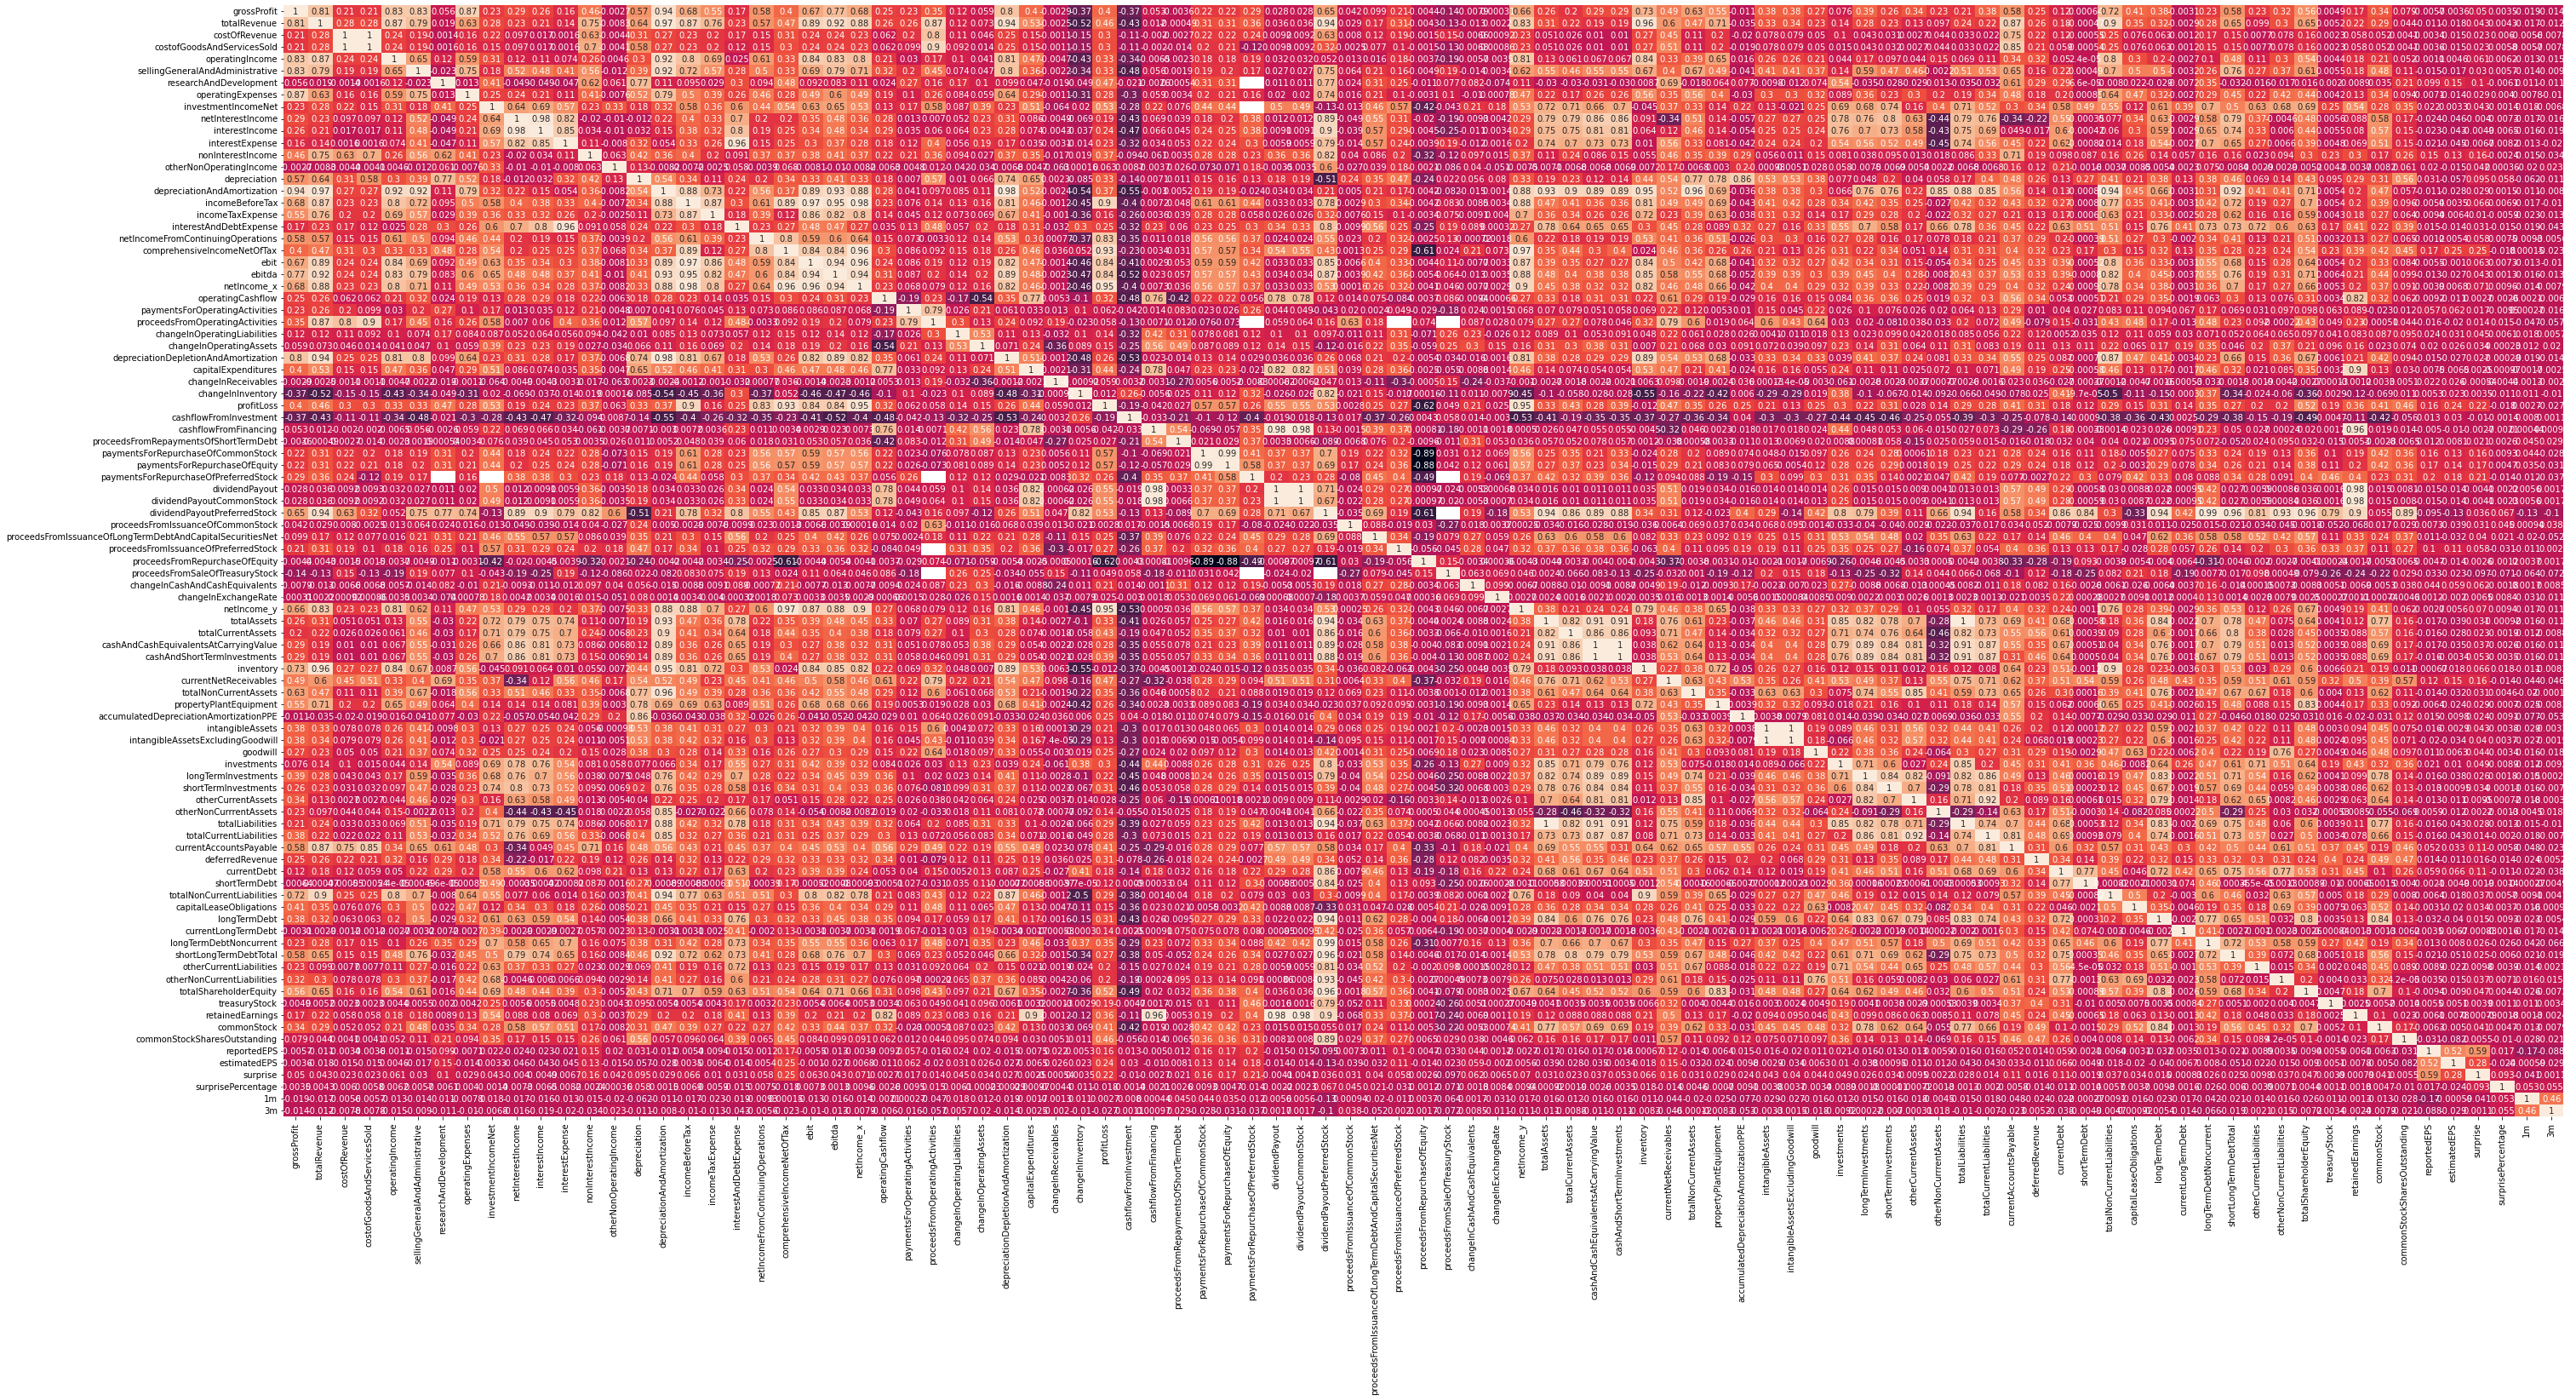

In [102]:
# correlation calculation
feature_corr = final_df.copy().corr()

# sorting and using 1m
sortedDesc = feature_corr["1m"].sort_values(ascending=False) 
print(sortedDesc.head(20))

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (48,24))
sns.heatmap(feature_corr, annot=True, cbar=False, )

3m                                       1.000000
1m                                       0.458345
surprisePercentage                       0.055193
proceedsFromIssuanceOfCommonStock        0.038099
proceedsFromRepaymentsOfShortTermDebt    0.028866
otherNonOperatingIncome                  0.022886
changeInOperatingAssets                  0.019815
otherNonCurrrentAssets                   0.017806
otherNonCurrentLiabilities               0.015386
changeInCashAndCashEquivalents           0.008488
changeInOperatingLiabilities             0.005678
deferredRevenue                          0.005194
treasuryStock                            0.003404
otherCurrentLiabilities                  0.002095
proceedsFromIssuanceOfPreferredStock     0.001952
dividendPayoutCommonStock                0.001722
dividendPayout                           0.001695
proceedsFromRepurchaseOfEquity           0.001656
surprise                                 0.001118
cashflowFromInvestment                   0.001103


<AxesSubplot:>

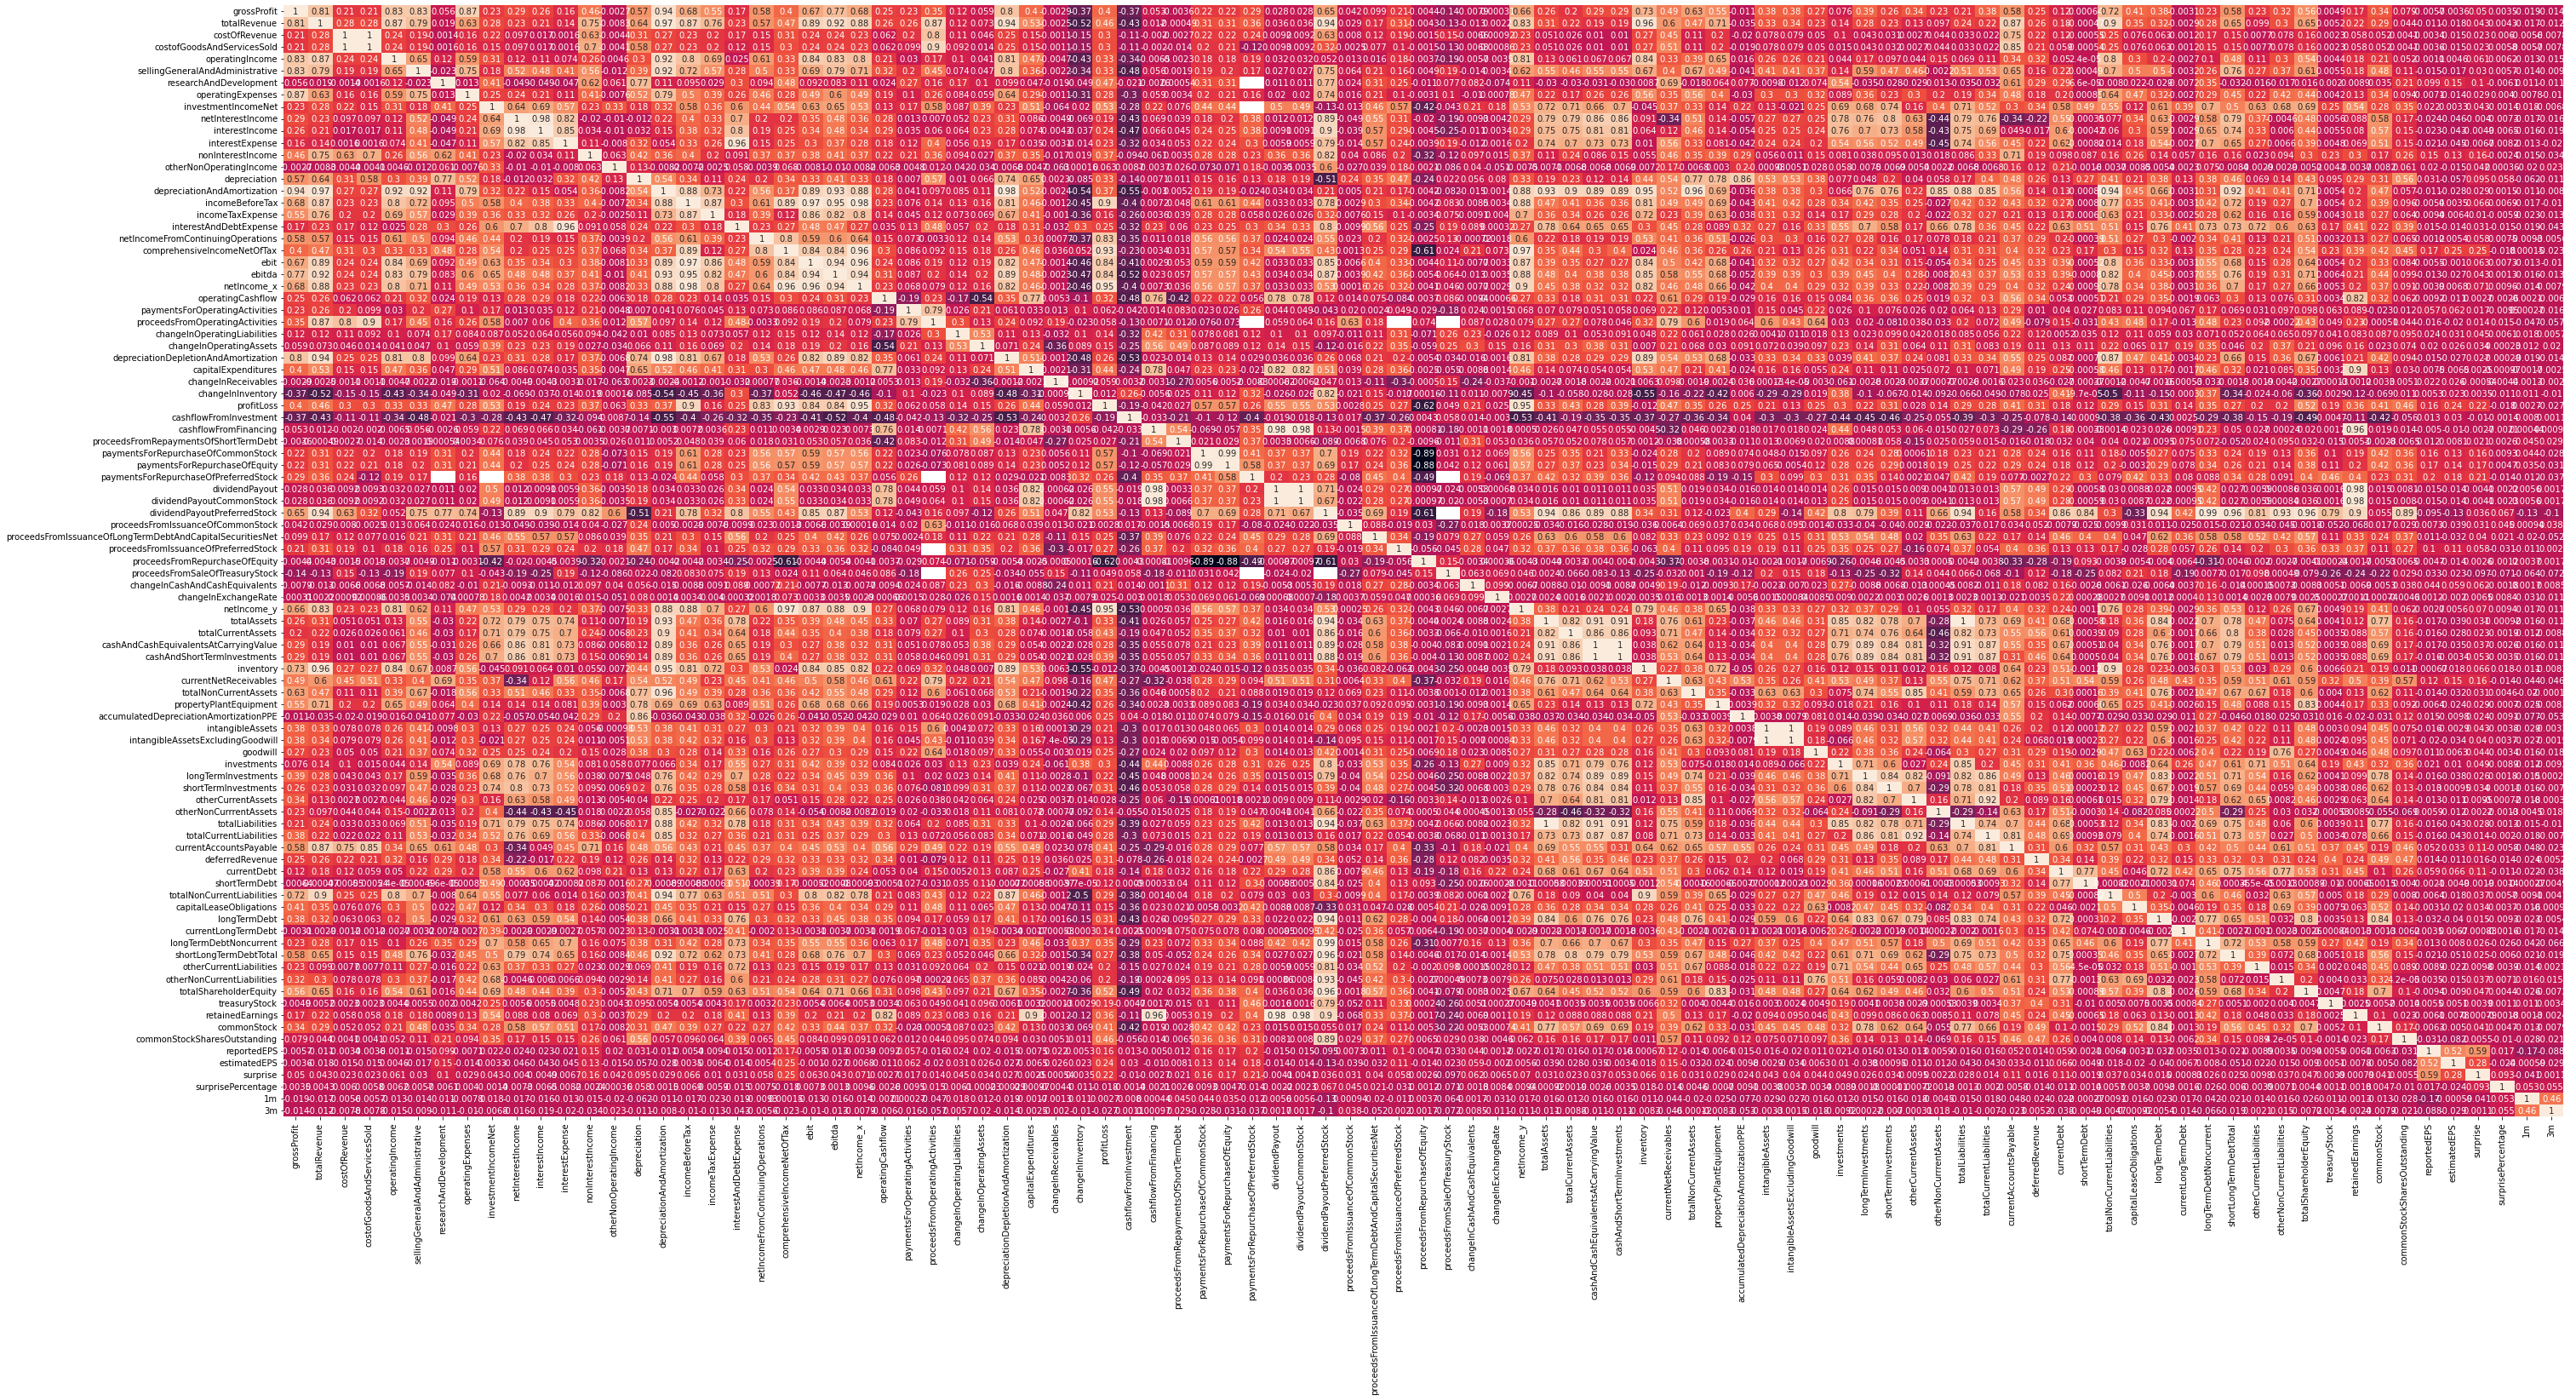

In [103]:
# sorting and using 3m
sortedDesc = feature_corr["3m"].sort_values(ascending=False) 
print(sortedDesc.head(20))

#cf_matrix = confusion_matrix(feature_corr)
plt.figure(figsize = (48,24))
sns.heatmap(feature_corr, annot=True, cbar=False, )